# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import urllib
import openweathermapy.core as owm 
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Import time
from time import strftime, localtime

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city key is unique, then add it to unique list 
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"{len(cities)} Unique Cities Found.")

594 Unique Cities Found.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Holding the values
city_data = {"City": [],
            "Cloudiness": [],
            "Country": [],
            "Date": [],
            "Humidity": [],
            "Latitude": [],
            "Longitude": [],
            "Max Temp": [],
            "Wind Speed": []}
i = 1
#URL and units to start the search
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
    
##Correct URL Format 
query_url = (url + "APPID=" + api_key + "&units=imperial" + "&q=")

for city in cities:
    response = requests.get(query_url + city).json()
    
    
    if response["cod"] != "404": 
        print("Processing Record {} | {}".format(i, city))
        city_data["City"].append(response['name'])
        city_data["Cloudiness"].append(response['clouds']['all'])
        city_data["Country"].append(response['sys']['country'])
        city_data["Date"].append(response['dt'])
        city_data["Humidity"].append(response['main']['humidity'])
        city_data["Latitude"].append(response['coord']['lat'])
        city_data["Longitude"].append(response['coord']['lat'])
        city_data["Max Temp"].append(response['main']['temp_max'])
        city_data["Wind Speed"].append(response['wind']['speed'])
        i += 1

        time.sleep(1.17)
    
    else: 
        print("City {} not found.  Skipping...".format(city))
        time.sleep(1.17)
        


Processing Record 1 | mataura
City grand river south east not found.  Skipping...
Processing Record 2 | gat
Processing Record 3 | buraydah
Processing Record 4 | atuona
Processing Record 5 | mogadishu
Processing Record 6 | khatanga
Processing Record 7 | kapaa
City mahadday weyne not found.  Skipping...
Processing Record 8 | ossora
Processing Record 9 | saint-philippe
Processing Record 10 | piacabucu
Processing Record 11 | qaanaaq
City mys shmidta not found.  Skipping...
Processing Record 12 | makurdi
Processing Record 13 | hobart
Processing Record 14 | san patricio
Processing Record 15 | rikitea
Processing Record 16 | guerrero negro
Processing Record 17 | spring hill
Processing Record 18 | ribeira grande
Processing Record 19 | hermanus
Processing Record 20 | kaitangata
Processing Record 21 | esperance
Processing Record 22 | port macquarie
City saleaula not found.  Skipping...
Processing Record 23 | gao
Processing Record 24 | hilo
Processing Record 25 | albany
Processing Record 26 | taiy

Processing Record 213 | tuatapere
Processing Record 214 | zhigansk
Processing Record 215 | uvat
Processing Record 216 | kailua
Processing Record 217 | karasjok
City houlung not found.  Skipping...
Processing Record 218 | mehamn
Processing Record 219 | boende
Processing Record 220 | faya
Processing Record 221 | hue
Processing Record 222 | sterling
Processing Record 223 | kavieng
Processing Record 224 | chuy
Processing Record 225 | kalmunai
City asau not found.  Skipping...
Processing Record 226 | kudat
Processing Record 227 | pirovskoye
Processing Record 228 | halifax
Processing Record 229 | lorengau
Processing Record 230 | san felipe
City azimur not found.  Skipping...
Processing Record 231 | mildura
Processing Record 232 | temuco
Processing Record 233 | koumac
Processing Record 234 | atar
Processing Record 235 | chunskiy
City geresk not found.  Skipping...
Processing Record 236 | sao joao da barra
Processing Record 237 | zavetnoye
Processing Record 238 | ada
Processing Record 239 | fo

City duz not found.  Skipping...
Processing Record 430 | alekseyevsk
Processing Record 431 | teya
Processing Record 432 | bonavista
Processing Record 433 | jauja
City nizhneyansk not found.  Skipping...
Processing Record 434 | lieksa
Processing Record 435 | touros
Processing Record 436 | kimberley
Processing Record 437 | maniitsoq
Processing Record 438 | salon
Processing Record 439 | olinda
Processing Record 440 | manresa
Processing Record 441 | santa maria
Processing Record 442 | hofn
Processing Record 443 | tofield
Processing Record 444 | miraflores
Processing Record 445 | urubicha
Processing Record 446 | henties bay
Processing Record 447 | ostersund
Processing Record 448 | mahajanga
Processing Record 449 | dunda
Processing Record 450 | saint joseph
Processing Record 451 | blythe
Processing Record 452 | sistranda
City jambol not found.  Skipping...
Processing Record 453 | bathsheba
Processing Record 454 | suoyarvi
City pinotepa nacional not found.  Skipping...
Processing Record 455 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Create DataFrame
city_df = pd.DataFrame(city_data)
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Butaritari,88,KI,1551670145,100,3.07,3.07,80.08,7.52
1,Ushuaia,20,AR,1551668400,61,-54.81,-54.81,46.40,9.17
2,Salalah,0,OM,1551667800,56,17.01,17.01,73.40,4.70
3,Richards Bay,88,ZA,1551670284,100,-28.77,-28.77,69.10,3.15
4,Alta Gracia,20,AR,1551668400,74,-31.66,-31.66,78.80,13.87


In [15]:
# Export the city data into a .csv
city_df.to_csv("output/weather.csv")

# Display the DataFrame
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Butaritari,88,KI,1551670145,100,3.07,3.07,80.08,7.52
1,Ushuaia,20,AR,1551668400,61,-54.81,-54.81,46.40,9.17
2,Salalah,0,OM,1551667800,56,17.01,17.01,73.40,4.70
3,Richards Bay,88,ZA,1551670284,100,-28.77,-28.77,69.10,3.15
4,Alta Gracia,20,AR,1551668400,74,-31.66,-31.66,78.80,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

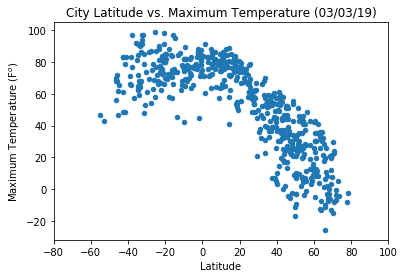

In [7]:
date = datetime.datetime.now().strftime("%x")

city_df.plot (kind='scatter', x='Latitude', y='Max Temp', 
                 title=f'City Latitude vs. Maximum Temperature ({date})', xlim=(-80,100))
plt.ylabel(f'Maximum Temperature (F$^o$)')

plt.savefig("output/Latitude_v_Temperature_Plot.png")

plt.show()

#### Latitude vs. Humidity Plot

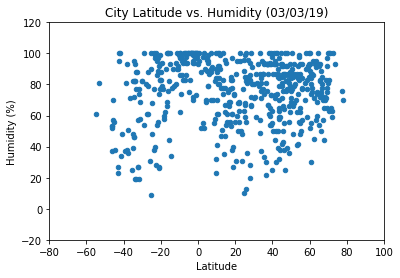

In [8]:
city_df.plot (kind='scatter', x='Latitude', y='Humidity',
                 title=f'City Latitude vs. Humidity ({date})', xlim=(-80,100), ylim=(-20,120))
plt.ylabel('Humidity (%)')

plt.savefig("output/Latitude_v_Humidity_Plot.png")

plt.show()

#### Latitude vs. Cloudiness Plot

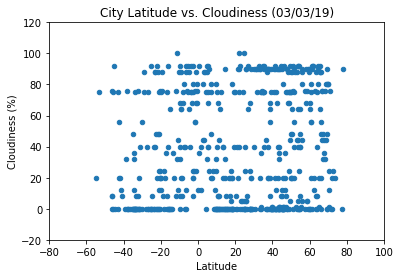

In [9]:
city_df.plot (kind='scatter', x='Latitude', y='Cloudiness',
                 title=f'City Latitude vs. Cloudiness ({date})', xlim=(-80,100), ylim=(-20, 120))
plt.ylabel('Cloudiness (%)')

plt.savefig("output/Latitude_v_Cloudiness_Plot.png")

plt.show()

#### Latitude vs. Wind Speed Plot

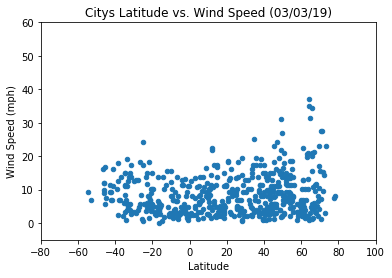

In [10]:
city_df.plot (kind='scatter', x='Latitude', y='Wind Speed',
                 title=f'Citys Latitude vs. Wind Speed ({date})', xlim=(-80,100), ylim=(-5,60))
plt.ylabel('Wind Speed (mph)')

plt.savefig("output/Latitude_v_Wind_Speed_Plot.png")

plt.show()

Observations:

According to the data the closer to the equator (0) you get the higher the tempatures get. The cities that are located around the equator have max temperatures of aroung 80f and up according to the scatterplot.

On the Latitude vs. Humidity Plot there does not appear to be a relationship between lattitude and humidity. According to the scatterplot cities between -60 and 80 lattitude appear to have little change in the humidity percentages. The cities averaged between 20 and 100 percent humidity regardsless of Lattitude. Which to me was an interesting observation. 

In regards to the Latitude vs. Cloudiness Plot, cites located in a lattitude range between -60 and 80 did have a noticeable change in percentages of cloudiness. The ranges were pretty spead out between 0 to 100 regardless of location. Maybe longitude would have more of an impact on cloudiness than lattitude.  